# Fine-Tuning MobileNet on sign language digits

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
from random import randint
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
train_n=150
valid_n=30
test_n=15

## 1. Image Preparation for Convolutional Neural Network with TensorFlow's Keras API

Dataset: https://github.com/ardamavi/Sign-Language-Digits-Dataset
   
  • 10 classes (digits 0-9)
  
  • class data:
  
         • class 0: 205 images
         • class 1: 206 images
         • class 2: 206 imageS
         • class 3: 206 images
         • class 4: 207 images
         • class 5: 207 images
         • class 6: 207 images
         • class 7: 206 images
         • class 8: 208 images
         • class 9: 204 images
         
Download data and save in current directory/data/Sign-Language-Digits-Dataset. Extract sub-directories labeled 0 through 9 and nest directories directly underneath Sign-Language-Digits-Dataset directory. Directory structure should look like this:

  
  • data/
  
         • Sign-Language-Digits-Dataset/
             ○  0/
             ○  1/
             ○  2/
             ○  ...
             ○  9/  

In [3]:
train_n=150
valid_n=30
test_n=15

In [4]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\0_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\0') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\0')
    
    for i in random.sample(glob.glob('*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\train\\0')  
os.chdir('../../')

In [5]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\1_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\1') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\1')
    
    for i in random.sample(glob.glob('*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\train\\1')  
os.chdir('../../')

In [6]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\2_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\2') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\2')
    
    for i in random.sample(glob.glob('*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\train\\2')  
os.chdir('../../')

In [7]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\3_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\3') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\3')
    
    for i in random.sample(glob.glob('*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\train\\3')  
os.chdir('../../')

In [8]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\4_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\4') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\4')
    
    for i in random.sample(glob.glob('*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\train\\4')  
os.chdir('../../')

In [9]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\5_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\5') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\5')
    
    for i in random.sample(glob.glob('*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\train\\5')  
os.chdir('../../')

In [10]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\6_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\6') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\6')
    
    for i in random.sample(glob.glob('*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\train\\6')  
os.chdir('../../')

In [11]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\7_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\7') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\7')
    
    for i in random.sample(glob.glob('*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\train\\7')  
os.chdir('../../')

In [12]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\8_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\8') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\8')
    
    for i in random.sample(glob.glob('*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\train\\8')  
os.chdir('../../')

In [13]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\9_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\train\\9') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\train\\9')
    
    for i in random.sample(glob.glob('*'), train_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\train\\9')  
os.chdir('../../')

In [14]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\0_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\0') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\0')
    
    for i in random.sample(glob.glob('*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\valid\\0')  
os.chdir('../../')

In [15]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\1_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\1') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\1')
    
    for i in random.sample(glob.glob('*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\valid\\1')  
os.chdir('../../')

In [16]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\2_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\2') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\2')
    
    for i in random.sample(glob.glob('*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\valid\\2')  
os.chdir('../../')

In [17]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\3_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\3') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\3')
    
    for i in random.sample(glob.glob('*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\valid\\3')  
os.chdir('../../')

In [18]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\4_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\4') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\4')
    
    for i in random.sample(glob.glob('*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\valid\\4')  
os.chdir('../../')

In [19]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\5_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\5') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\5')
    
    for i in random.sample(glob.glob('*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\valid\\5')  
os.chdir('../../')

In [20]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\6_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\6') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\6')
    
    for i in random.sample(glob.glob('*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\valid\\6')  
os.chdir('../../')

In [21]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\7_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\7') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\7')
    
    for i in random.sample(glob.glob('*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\valid\\7')  
os.chdir('../../')

In [22]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\8_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\8') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\8')
    
    for i in random.sample(glob.glob('*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\valid\\8')  
os.chdir('../../')

In [23]:
# Organize data into valid directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\9_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\valid\\9') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\valid\\9')
    
    for i in random.sample(glob.glob('*'), valid_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\valid\\9')  
os.chdir('../../')

In [24]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\0_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\0') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\0')
    
    for i in random.sample(glob.glob('*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\test\\0')  
os.chdir('../../')

In [25]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\1_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\1') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\1')
    
    for i in random.sample(glob.glob('*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\test\\1')  
os.chdir('../../')

In [26]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\2_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\2') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\2')
    
    for i in random.sample(glob.glob('*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\test\\2')  
os.chdir('../../')

In [27]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\3_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\3') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\3')
    
    for i in random.sample(glob.glob('*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\test\\3')  
os.chdir('../../')

In [28]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\4_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\4') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\4')
    
    for i in random.sample(glob.glob('*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\test\\4')  
os.chdir('../../')

In [29]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\5_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\5') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\5')
    
    for i in random.sample(glob.glob('*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\test\\5')  
os.chdir('../../')

In [30]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\6_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\6') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\6')
    
    for i in random.sample(glob.glob('*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\test\\6')  
os.chdir('../../')

In [31]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\7_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\7') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\7')
    
    for i in random.sample(glob.glob('*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\test\\7')  
os.chdir('../../')

In [32]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\8_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\8') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\8')
    
    for i in random.sample(glob.glob('*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\test\\8')  
os.chdir('../../')

In [33]:
# Organize data into test directories
os.chdir('C:\\Users\\רועי\\data\\sign-language-digits\\9_set')
if os.path.isdir('C:\\Users\\רועי\\data\\sign-language-digits\\test\\9') is False:
    os.makedirs('C:\\Users\רועי\\data\\sign-language-digits\\test\\9')
    
    for i in random.sample(glob.glob('*'), test_n):
        shutil.move(i, 'C:\\Users\\רועי\\data\\sign-language-digits\\test\\9')  
os.chdir('../../')

In [34]:
train_path = 'C:\\Users\\רועי\\\data\\sign-language-digits\\train'
valid_path = 'C:\\Users\\רועי\\\data\\sign-language-digits\\valid'
test_path = 'C:\\Users\\רועי\\\data\\sign-language-digits\\test'

In [35]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), classes=['0','1','2','3','4','5','6','7'\
,'8','9'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['0','1','2','3','4','5','6','7'\
,'8','9'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224,224), classes=['0','1','2','3','4','5','6','7'\
,'8','9'], batch_size=10, shuffle=False)

Found 1500 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 150 images belonging to 10 classes.


In [36]:
assert train_batches.n == train_n * 10
assert valid_batches.n == valid_n * 10
assert test_batches.n  == test_n*10
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

In [37]:
# plot images in the form of a 1 by 10 grid and resize img to 20x20
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

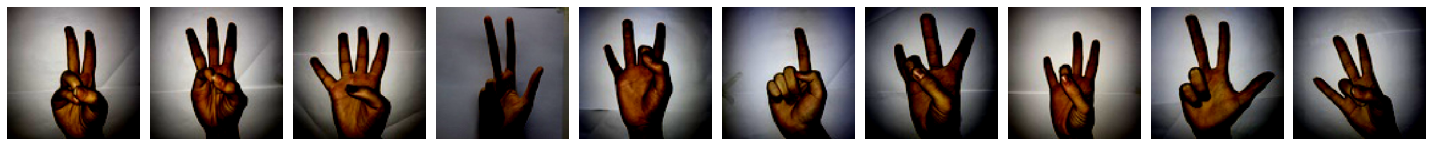

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [38]:
train_imgs, train_labels = next(train_batches)
plotImages(train_imgs)
print(train_labels)